In [ ]:
# This rescales flux expected from the Sun at 4.05 um, so that 
# I can check if my interpolated models are giving the right masses

# Created 2020 July 13 by E.S.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df_nircam = pd.read_csv("data/JWST_NIRCam.F405N.dat",delim_whitespace=True)
df_nircam["um"] = np.divide(df_nircam["angstr"],10000)

In [18]:
df_lmir = pd.read_csv("data/br-alpha_NDC.txt",delim_whitespace=True)

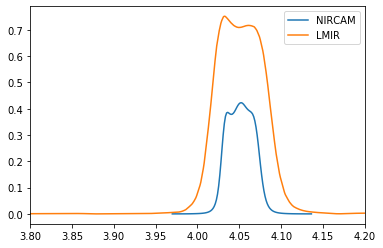

In [20]:
plt.plot(df_nircam["um"],df_nircam["trans"],label="NIRCAM")
plt.plot(df_lmir["Wavelength"],df_lmir["Trans_77"],label="LMIR")
plt.xlim([3.8,4.2])
plt.legend()
plt.show()

In [23]:
# find wavelength spacings

spacing_nircam = np.subtract(df_nircam["um"],np.roll(df_nircam["um"],1))
spacing_lmir = np.subtract(df_lmir["Wavelength"],np.roll(df_lmir["Wavelength"],1))

In [28]:
# integrate under curves

nircam_integrate = np.sum(np.multiply(df_nircam["trans"],spacing_nircam))
lmir_integrate = np.sum(np.multiply(df_lmir["Trans_77"],spacing_lmir))

In [27]:
nircam_integrate

0.019217560287370032

In [29]:
lmir_integrate

0.05697114000000003

In [30]:
# the flux difference I would expect 

flux_ratio = np.divide(lmir_integrate,nircam_integrate)
print(flux_ratio)

In [33]:
# the magnitude difference I would expect

mag_diff = -2.5*np.log10(flux_ratio)
print(mag_diff)

-1.1798916441637566


In [34]:
# the abs mag of the Sun I would expect through LMIR Br-alpha filter
# (abs mag of Sun in Nircam filter from Wilmer 2018, Table 3)
# NIRCAM_F405N 3.24

M_sun_nircam = 3.24
M_sun_lmir = M_sun_nircam + mag_diff

print(M_sun_lmir)

2.0601083558362436
